# IMPORTING TENSORFLOW


In [ ]:
!pip install tensorflow

# IMPORTING TENSORFLOW

In [ ]:
import tensorflow as tf

# USING CPU


In [ ]:
device = "/device:CPU:0"

# DATA IMPORTING 

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data"

classes = os.listdir(dir_example)
print(classes)

In [ ]:
dir_example = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data"

train_classes = os.listdir(dir_example)
print(train_classes)

# DATA VISUALIZATION

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

# Correct path
dir_with_examples = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data"
files_per_row = 6

# Check if directory exists
if not os.path.exists(dir_with_examples):
    print("❌ ERROR: Directory not found! Check the path.")
else:
    files_in_dir = os.listdir(dir_with_examples)
    
    if not files_in_dir:
        print("❌ ERROR: No files found in the directory!")
    else:
        number_of_cols = files_per_row
        number_of_rows = math.ceil(len(files_in_dir) / number_of_cols)  # FIXED

        # Generate the subplots
        fig, axs = plt.subplots(number_of_rows, number_of_cols, figsize=(20, 15))

        # Flatten axs if there's only one row
        if number_of_rows == 1:
            axs = [axs]

        # Map each file to subplot
        for i, file_name in enumerate(files_in_dir):
            try:
                image = Image.open(os.path.join(dir_with_examples, file_name))
                row, col = divmod(i, files_per_row)
                axs[row][col].imshow(image)
                axs[row][col].axis('off')
            except Exception as e:
                print(f"Error loading {file_name}: {e}")

        # Hide empty subplots
        for i in range(len(files_in_dir), number_of_rows * number_of_cols):
            row, col = divmod(i, files_per_row)
            axs[row][col].axis('off')

        # Show the plot
        plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA 

In [ ]:
train = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test"
test = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Train"


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Train"

# Check if the path exists
if not os.path.exists(train):
    print(f"❌ Error: The directory '{train}' does not exist.")
    exit()
else:
    print(f"✅ Train folder found: {train}")

# Data Generator
train_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size=(300, 300),
                                                      batch_size=32,
                                                      class_mode='sparse')

# Get class labels
labels = train_generator.class_indices
print("\nClass Indices:", labels)

# Reverse dictionary mapping
labels = {v: k for k, v in labels.items()}
print("\nMapped Labels:", labels)


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
test = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test"

# Check if the path exists
if not os.path.exists(test):
    print(f"❌ Error: The directory '{test}' does not exist.")
    exit()
else:
    print(f"✅ Test folder found: {test}")

# Data Generator
test_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size=(300, 300),
                                                    batch_size=32,
                                                    class_mode='sparse')

# Get class labels
test_labels = test_generator.class_indices
print("\nTest Class Indices:", test_labels)

# Reverse dictionary mapping
test_labels = {v: k for k, v in test_labels.items()}
print("\nMapped Test Labels:", test_labels)


# Importing oneDNN 

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('CPU'))


# LABELING 

In [ ]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

# CREATING MODEL WITH oneDNN OPTIMIZATION 

In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





# COMPILING MODEL  # Enable OneDNN optimizations

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# TRAINING THE MODEL(10 EPOCHS)

In [ ]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

# TESTING PREDICTION 

In [ ]:
import keras.utils as ku
import numpy as np

✅ Using image: C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test\cardboard\cardboard353.jpg


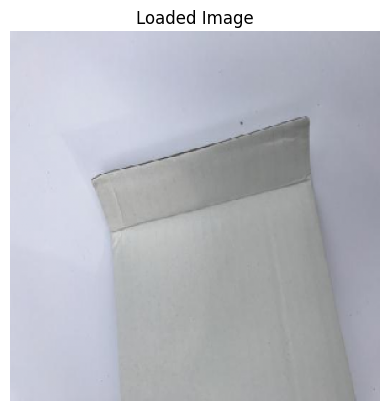

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Path to one of the image files inside a subfolder
test_folder = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test"

# Get the first category folder (e.g., 'cardboard', 'glass', etc.)
category_folder = os.listdir(test_folder)[0]  # Picks the first subfolder
category_path = os.path.join(test_folder, category_folder)

# Get the first image inside that category folder
image_files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

if len(image_files) == 0:
    print("❌ No images found inside:", category_path)
else:
    test_img_path = os.path.join(category_path, image_files[0])  # Select first image
    print("✅ Using image:", test_img_path)

    # Load and preprocess image
    img = load_img(test_img_path, target_size=(300, 300))
    img = img_to_array(img, dtype=np.uint8)
    img = np.array(img) / 255.0  # Normalize

    # Show image
    plt.axis('off')
    plt.imshow(img)
    plt.title("Loaded Image")
    plt.show()


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a simple CNN model (Modify as per your requirements)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define dataset path
train_dir = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Train"

# Check if training data exists
if not os.path.exists(train_dir):
    print(f"❌ Training data folder not found at {train_dir}")
else:
    # Load data using ImageDataGenerator
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(train_dir, target_size=(300, 300), batch_size=32, class_mode='sparse')

    # Train the model
    model.fit(train_generator, epochs=5)

    # Save the model after training
    model_path = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\model.h5"
    model.save(model_path)
    print(f"✅ Model saved successfully at {model_path}")


Found 2186 images belonging to 6 classes.
Epoch 1/5
69/69 [==============================] - 94s 1s/step - loss: 15.3418 - accuracy: 0.3234
Epoch 2/5
69/69 [==============================] - 92s 1s/step - loss: 1.1101 - accuracy: 0.5851
Epoch 3/5
69/69 [==============================] - 91s 1s/step - loss: 0.7952 - accuracy: 0.7402
Epoch 4/5
69/69 [==============================] - 94s 1s/step - loss: 0.5450 - accuracy: 0.8303
Epoch 5/5
69/69 [==============================] - 92s 1s/step - loss: 0.3832 - accuracy: 0.9053


c:\Users\usham\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model saved successfully at C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\model.h5


✅ Model loaded successfully.
1/1 [==============================] - 0s 129ms/step

📊 Prediction Results:
CARDBOARD: 0.73%
GLASS: 2.39%
METAL: 60.37%
PAPER: 31.91%
PLASTIC: 0.94%
TRASH: 3.66%


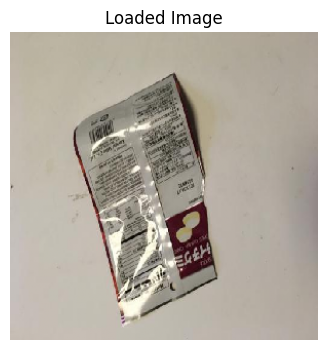

In [1]:
import os
import numpy as np
import tensorflow.keras.models as km
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Load trained model (Ensure the path exists)
model_path = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\model.h5"

if not os.path.exists(model_path):
    print(f"❌ Error: Model file not found at {model_path}")
    exit()

try:
    model = km.load_model(model_path)
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

# Define labels (modify if needed)
labels = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Path to an existing image in the Test folder
test_img_path = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test\plastic\plastic459.jpg"

if not os.path.exists(test_img_path):
    print(f"❌ Error: Image file not found at {test_img_path}")
    exit()

# Load and preprocess the image
img = load_img(test_img_path, target_size=(300, 300))  # Resize image
img = img_to_array(img, dtype=np.uint8)  # Convert to array
img = np.array(img) / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Perform prediction
prediction = model.predict(img)

# Print results
print("\n📊 Prediction Results:")
for i, prob in enumerate(prediction[0]):
    print(f"{labels[i].upper()}: {round(prob * 100, 2)}%")

# Display the image
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img.squeeze())  # Remove cmap for better color
plt.title("Loaded Image")
plt.show()


1/1 [==============================] - 0s 57ms/step
Probability: 0.39010492
Classified: glass 



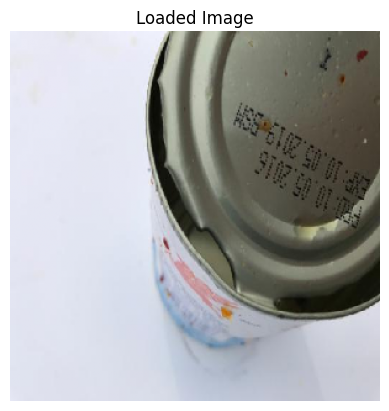

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# ✅ Correct file path
test_img = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test\metal\metal366.jpg"

# Load and preprocess the image
img = load_img(test_img, target_size=(300, 300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img) / 255.0

# Perform prediction (Ensure `model` and `labels` are defined)
prediction = model.predict(img[np.newaxis, ...])

# Print results
print("Probability:", np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:", predicted_class, '\n')

# Display the image
plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


In [7]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.64 %
GLASS : 39.01 %
METAL : 29.97 %
PAPER : 11.55 %
PLASTIC : 17.22 %
TRASH : 0.61 %


❌ File not found: Trash-Classifier-in-Python-using-Tensorflow/Data/Test/plastic/plastic430.jpg
1/1 [==============================] - 0s 63ms/step
Probability: 0.8142548
Classified: plastic 



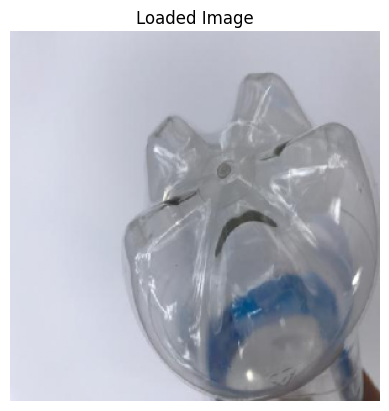

In [ ]:
import numpy as np
import os

test_img = r"Trash-Classifier-in-Python-using-Tensorflow/Data/Test/plastic/plastic430.jpg"

if os.path.exists(test_img):
    print("✅ File exists:", test_img)
else:
    print("❌ File not found:", test_img)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# ✅ Correct file path
test_img = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test\plastic\plastic430.jpg"

# Load and preprocess the image
img = load_img(test_img, target_size=(300, 300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img) / 255.0

# Perform prediction (Ensure `model` and `labels` are defined)
prediction = model.predict(img[np.newaxis, ...])

# Print results
print("Probability:", np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:", predicted_class, '\n')

# Display the image
plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


In [13]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 2.62 %
GLASS : 3.0 %
METAL : 5.88 %
PAPER : 6.96 %
PLASTIC : 81.43 %
TRASH : 0.11 %


1/1 [==============================] - 0s 94ms/step
Probability: 0.8142548
Classified: plastic 



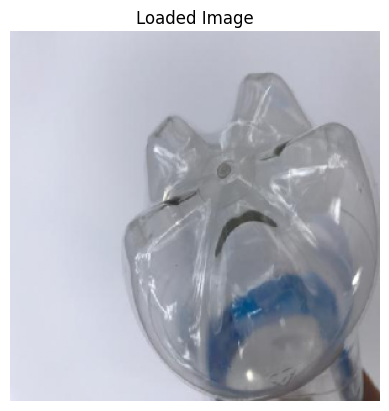

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array  # ✅ Correct import

# Define the correct image path
test_img = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test\plastic\plastic430.jpg"

# Verify the file exists
if not os.path.exists(test_img):
    print(f"❌ File not found: {test_img}")
    exit()

# Load and preprocess the image
img = load_img(test_img, target_size=(300, 300))  # ✅ Corrected function
img = img_to_array(img, dtype=np.uint8)  # ✅ Corrected function
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Perform prediction
prediction = model.predict(img)

# Print results
print("Probability:", np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:", predicted_class, "\n")

# Display the image
plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


In [17]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 2.62 %
GLASS : 3.0 %
METAL : 5.88 %
PAPER : 6.96 %
PLASTIC : 81.43 %
TRASH : 0.11 %


# SAVING THE TRAINED MODEL

In [21]:
# Save the trained model as an H5 file
model.save(r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\model.h5")
print("✅ Model saved successfully.")


✅ Model saved successfully.


In [22]:
from tensorflow.keras.models import load_model
import os

# Load the trained model
model_path = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\model.h5"

if not os.path.exists(model_path):
    print(f"❌ Error: Model file not found at {model_path}")
    exit()

model = load_model(model_path)
print("✅ Model loaded successfully.")


✅ Model loaded successfully.


1/1 [==============================] - 0s 135ms/step
✅ Classified as: plastic (81.43%)


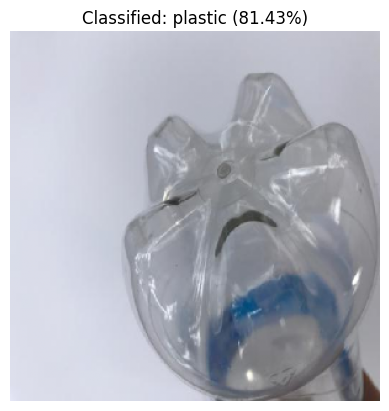

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Define class labels
labels = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Path to a test image (Update this path with a valid image)
test_img_path = r"C:\Users\usham\Desktop\mini_project\Smart-Garbage-Segregation\Data\Test\plastic\plastic430.jpg"

if not os.path.exists(test_img_path):
    print(f"❌ Error: Image file not found at {test_img_path}")
    exit()

# Load and preprocess the image
img = load_img(test_img_path, target_size=(300, 300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img) / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img)

# Display prediction results
predicted_class = labels[np.argmax(prediction[0])]
probability = np.max(prediction[0]) * 100

print(f"✅ Classified as: {predicted_class} ({probability:.2f}%)")

# Show the image
plt.axis('off')
plt.imshow(img.squeeze())
plt.title(f"Classified: {predicted_class} ({probability:.2f}%)")
plt.show()


In [2]:
import os
import numpy as np
import tensorflow.keras.models as km
import tkinter as tk
from tkinter import filedialog, Label, Button, Canvas, PhotoImage
from PIL import Image, ImageTk
from tensorflow.keras.utils import load_img, img_to_array

# Load the trained model
model_path = r"C:\Users\usham\Desktop\PROJECTS\mini_project\Smart-Garbage-Segregation\model.h5"
model = km.load_model(model_path)
labels = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
plastic_types = ["PET", "HDPE", "PVC", "LDPE", "PP", "PS", "Other"]  # Example plastic types

# Initialize Tkinter window
root = tk.Tk()
root.title("Garbage Classification")
root.geometry("600x700")
root.configure(bg="#2C3E50")

# UI Elements
frame = tk.Frame(root, bg="#34495E", padx=20, pady=20)
frame.pack(pady=20, padx=20, fill=tk.BOTH, expand=True)

header_label = Label(frame, text="Upload an Image or Video for Classification", font=("Arial", 16, "bold"), bg="#34495E", fg="white")
header_label.pack(pady=10)

canvas = Canvas(frame, width=350, height=350, bg="#ECF0F1", relief="solid", bd=2)
canvas.pack(pady=10)

result_label = Label(frame, text="", font=("Arial", 14, "bold"), bg="#34495E", fg="white")
result_label.pack(pady=10)

def upload_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    if not file_path:
        return
    
    # Load and process image
    img = load_img(file_path, target_size=(300, 300))
    img_array = img_to_array(img, dtype=np.uint8) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Perform prediction
    prediction = model.predict(img_array)
    print("Model Predictions:", prediction[0])

    plastic_prob = round(prediction[0][4] * 3900, 1)
    plastic_type = "NONE" if plastic_prob == 0 else plastic_types[np.argmax(prediction[0])]  # Example of selecting plastic type
    
    # Determine severity
    if plastic_prob <= 30:
        severity = "MILD"
        severity_color = "green"
    elif plastic_prob <= 65:
        severity = "MEDIUM"
        severity_color = "orange"
    else:
        severity = "SEVERE"
        severity_color = "red"
    
    # Display image in UI
    img = Image.open(file_path)
    img.thumbnail((350, 350))
    img = ImageTk.PhotoImage(img)
    canvas.create_image(175, 175, image=img)
    canvas.image = img  # Keep reference
    
    # Display result
    result_label.config(text=f"Plastic Percentage: {plastic_prob}%\nPlastic Type: {plastic_type}\nSeverity: {severity}", fg=severity_color)
    
# Upload Buttons
button_frame = tk.Frame(frame, bg="#34495E")
button_frame.pack(pady=20)

upload_image_button = Button(button_frame, text="Upload Image", font=("Arial", 14), command=upload_image, bg="#27AE60", fg="white", padx=15, pady=8)
upload_image_button.grid(row=0, column=0, padx=10)

upload_video_button = Button(button_frame, text="Upload Video", font=("Arial", 14), bg="#2980B9", fg="white", padx=15, pady=8)
upload_video_button.grid(row=0, column=1, padx=10)

# Run the Tkinter loop
root.mainloop()


1/1 [==============================] - 0s 129ms/step
Model Predictions: [4.8150308e-02 1.0185659e-06 1.0927832e-01 8.4166247e-01 9.0794702e-04
 2.2204155e-10]
1/1 [==============================] - 0s 95ms/step
Model Predictions: [7.0189774e-02 2.2923614e-07 4.8348187e-03 9.1511363e-01 9.8614870e-03
 2.0418762e-11]
